# Project 1

In this project, you will explore using linear regression to solve a problem
in a few different ways.  The particular problem is predicting the miles-per-gallon that a car gets based on a number of characteristics about that car.

To complete this project, you will write Python code in places marked
`# YOUR CODE HERE`.  There are also code cells in this notebook you must run
to produce various kinds of plots and graphs.  There are also a number of cells
marked with `# YOUR ANSWER HERE` where you will answer questions.


In [2]:
# FILL THESE IN:

# Name: Maria Vega Vazquez
# Honor Code Pledge: 

## Getting started

In [3]:
# Set up libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [4]:
# Read data

# Write code below to read the CSV file "cardata.csv" and put it into a
# Pandas dataframe called `df`:

# YOUR CODE HERE
df = pd.read_csv("cardata.csv")
df

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0         130    3504          12.0   
1    15.0          8         350.0         165    3693          11.5   
2    18.0          8         318.0         150    3436          11.0   
3    16.0          8         304.0         150    3433          12.0   
4    17.0          8         302.0         140    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
387  27.0          4         140.0          86    2790          15.6   
388  44.0          4          97.0          52    2130          24.6   
389  32.0          4         135.0          84    2295          11.6   
390  28.0          4         120.0          79    2625          18.6   
391  31.0          4         119.0          82    2720          19.4   

     modelyear                    carname  
0           70  chevrolet chevelle malibu  
1           70          buick skylark 320  
2           70         plymouth satellite  
3           70              amc rebel sst  
4           70                ford torino  
..         ...                        ...  
387         82            ford mustang gl  
388         82                  vw pickup  
389         82              dodge rampage  
390         82                ford ranger  
391         82                 chevy s-10  

[392 rows x 8 columns]

In [5]:
# Display the first few lines of this data:

print(len(df)) # Should be 392
df.head()  # Verify this looks ok

392


mpg  cylinders  displacement  horsepower  weight  acceleration  modelyear  \
0  18.0          8         307.0         130    3504          12.0         70   
1  15.0          8         350.0         165    3693          11.5         70   
2  18.0          8         318.0         150    3436          11.0         70   
3  16.0          8         304.0         150    3433          12.0         70   
4  17.0          8         302.0         140    3449          10.5         70   

                     carname  
0  chevrolet chevelle malibu  
1          buick skylark 320  
2         plymouth satellite  
3              amc rebel sst  
4                ford torino

In [6]:
# Select only the numeric attributes

# We want to write code to select out the numeric attributes (everything
# except the name of the car).  Our 6 features for X will be
# 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', and 'modelyear'
# while the feature we are predicting will be 'mpg'.

# Write code below to create two new dataframes, one that will become our
# X matrix and one that will become our vector of y values.  
# The X matrix should be called df_X and the vector of y values 
# should be called df_y.

# YOUR CODE HERE

# data frame of y values 
df_y = df['mpg']

# X data frame
df_X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'modelyear']]
df_X

#print("matrix shape: ", df_X.shape)      # (392, 6)
#print("vector shape: ", df_y.shape)      # (392,)

cylinders  displacement  horsepower  weight  acceleration  modelyear
0            8         307.0         130    3504          12.0         70
1            8         350.0         165    3693          11.5         70
2            8         318.0         150    3436          11.0         70
3            8         304.0         150    3433          12.0         70
4            8         302.0         140    3449          10.5         70
..         ...           ...         ...     ...           ...        ...
387          4         140.0          86    2790          15.6         82
388          4          97.0          52    2130          24.6         82
389          4         135.0          84    2295          11.6         82
390          4         120.0          79    2625          18.6         82
391          4         119.0          82    2720          19.4         82

[392 rows x 6 columns]

In [7]:
# Display the first few lines of this data:

print(len(df_X)) # Should be 392
print(len(df_y)) # Should be 392
df_X.head()  # Verify this looks ok

392
392


cylinders  displacement  horsepower  weight  acceleration  modelyear
0          8         307.0         130    3504          12.0         70
1          8         350.0         165    3693          11.5         70
2          8         318.0         150    3436          11.0         70
3          8         304.0         150    3433          12.0         70
4          8         302.0         140    3449          10.5         70

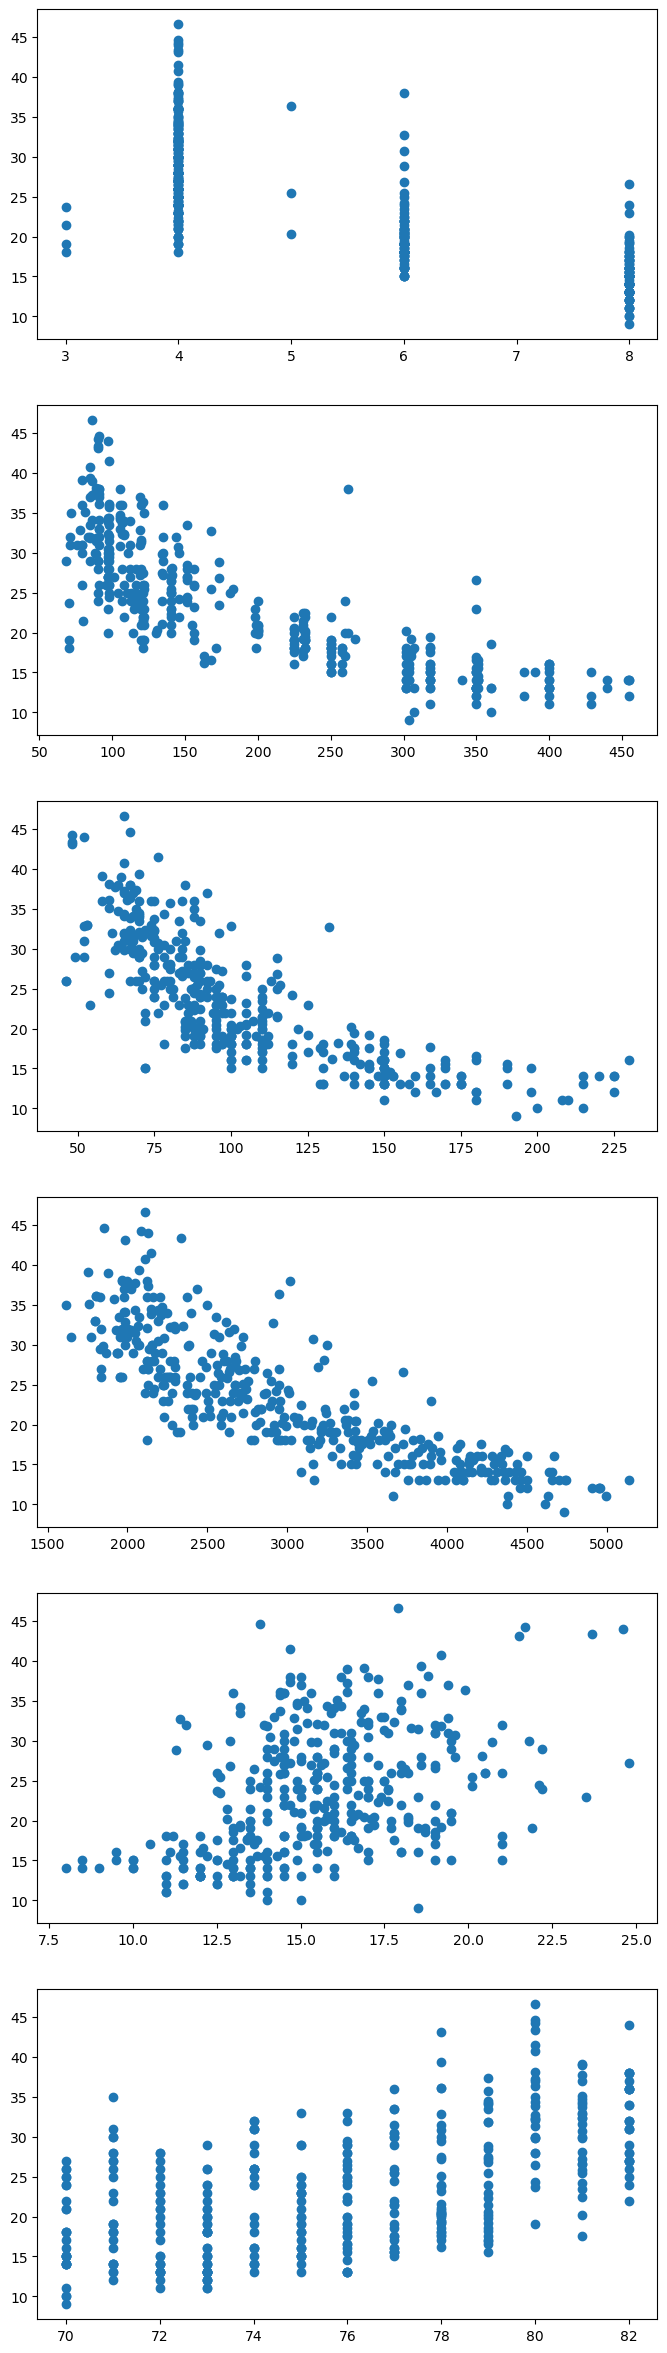

In [8]:
# Visualizing the data

# Run this cell to generate some plots of our input features displayed
# against the feature we're trying to predict (mpg).

fig, ax = plt.subplots(6, figsize=(8,30))
ax[0].scatter(df['cylinders'], df['mpg'])
ax[1].scatter(df['displacement'], df['mpg'])
ax[2].scatter(df['horsepower'], df['mpg'])
ax[3].scatter(df['weight'], df['mpg'])
ax[4].scatter(df['acceleration'], df['mpg'])
ax[5].scatter(df['modelyear'], df['mpg'])
plt.show()

In [9]:
# Convert to numpy arrays

# Write code below to create two new numpy arrays, one for df_X
# called X_train_initial and one for df_y called y_train.
# The name X_train_initial will make sense in a minute.

# YOUR CODE HERE
X_train_initial = df_X.to_numpy()      # makes it to an array
y_train = df_y.to_numpy()              

# Verify data:

print(X_train_initial.shape) # Should be (392, 6)
print(y_train.shape) # Should be (392,)  <--- note ONE dimensional!

(392, 6)
(392,)


In [10]:
# Set up dimensional variables.

# We use m for the number of training examples, and 
# n for the number of features.  
# Calculate these from the data (not hard-coded):

m = len(X_train_initial)
n = len(df_X.columns)

# Verify data:

print(m, n)  # should print 392 6, meaning 392 training examples and 6 features

392 6


In [11]:
# Write code below to add a column of ones to the X_train_initial
# matrix, and store this in a new matrix X_train:

v1 = np.ones((m , 1))                                # creates a 2-d array of length m x 1 
X_train = np.hstack((v1, X_train_initial))            # new matrix

# Verify new dimensions:

print(X_train.shape) # Should be (392, 7)

(392, 7)


## Part A: Solving linear regression the "easy" way

Linear regression happens to be one of the few machine learning
algorithms where it is possible to directly "solve" it: we can 
compute the true values for the $w$ vector that will minimize the cost
function $J(\boldsymbol{w})$ by using the calculation:


$$\boldsymbol{w} = (X^T X)^{-1}X^T y$$

In [12]:
# Write code below to compute the w vector directly using
# the equation above.  Store this in a vector called w_direct.



# variables 
x = X_train
y = y_train

# transpose of x 
x_t = x.T


# dot product of transpose of x and x 
dotP = x_t @ x

# inverse of the dot product
inv_dotP = np.linalg.inv(dotP)
w_dir = inv_dotP @ x_t

# multiply 
w_direct = w_dir @ y

# Verify:

print(w_direct)

[-1.45352505e+01 -3.29859089e-01  7.67843024e-03 -3.91355574e-04
 -6.79461791e-03  8.52732469e-02  7.53367180e-01]


In [13]:
# Below, write a sentence about how to interpret these 
# numbers in w_direct, in particular, (1) why are some negative
# and some positive, and (2) what is the special interpretation of
# w_direct[0]?

# YOUR ANSWER HERE:
# The predictions made above represent the cost of the values found through the normal equation. Some values are
# negative, meaning that they are below the line and others are positve, which means that they are above the line.
# The line tells one how far off they are in terms of result, or the cost of the function. w_direct[0] is 
# interesting since it is below the line and closer to 1, meaning that it is not a reliable result of what
# we are trying to find. 

## Part B: Linear regression the "hard" way




In [14]:
# Define the make_prediction function below to make a
# prediction for one example (one feature vector x_data)
# and parameter vector w.  
# Do this using the dot product (np.dot() function), rather than a loop.

def make_prediction(X_data, w):
    """
    x_data: array of features (n+1)
    w: array of weights (n+1)
    returns: scalar
    """
    
    # dot products the x vector and w vector 
    return np.dot(X_data, w)
    

In [15]:
# Define the compute_cost function below to compute the
# total cost over the entire data set X_data and y_data,
# given parameters vector w.
# Do not use matrix computations here; call your make_prediction() function
# that you defined above.  You should have one loop.

def compute_cost(X_data, y_data, w):
    """
    X_data: matrix (m, n+1)
    y_data: array of true y values (m)
    w: array of weights (n+1)
    returns: scalar
    """
        
    # dot products the x vector and w vector 
    # subtracts each iteration of make_prediction by corresponding y
    # y carrot - y
    
    m = len(X_data) 
    total_cost = 0
    
    # goes through the whole matrix  
    for i in range(0, m):
        y = y_data[i]                           # y^(i)
        x = X_data[i]
        y_hat = make_prediction(x, w)   #y^(i) prediction 
        
        cost = (y_hat - y)**2                   # matrix for the cost 
        
        total_cost += cost
        
    
    return total_cost/ (2 * m)

In [132]:
# Write code below to compute the cost of our training 
# data on the directly-computed values of w.  That is, compute
# J(w_direct) and store this in a variable called w_direct_cost.
# We know we can't do any better than this cost!

# YOUR CODE HERE
w_direct_cost = compute_cost(X_train, y_train, w_direct)

# Verify:

print("Minimum cost:", w_direct_cost) # should be less than 10

Minimum cost: 5.795085490707611


In [17]:
# Define the compute_gradient function below to compute
# the complete gradient for the function J(w).  
# Do not use matrix computations here; call your make_prediction() function
# that you defined above.  You should have two nested loops.

def compute_gradient(X_data, y_data, w):
    """
    X_data: matrix (m, n+1)
    y_data: array of true y values (m)
    w: array of weights (n+1)
    returns: array of gradients (n+1)
    """

    gradients = []
    
    # does the summation 
    for j in range(0, n+1):
        gradient_w = 0                                    # summation restarts with each iteration 
        
        for i in range(0, m):                             # computes the equation  
            y = y_data[i]                                 # y^(i)
            y_hat = make_prediction(X_data[i], w)         # y^(i) prediction 
            
            grad_w = (y_hat - y) * X_data[i][j]
            gradient_w += grad_w 
            
        gradients.append(gradient_w / m)                  # puts it in the matrix 
        
    gradients_matrix = np.array(gradients)

    return gradients_matrix
    

In [28]:
# Write code here to perform gradient descent, using your
# functions above.  You should use three new variables in your
# code:
# - w_manual: which is the vector of weights that gradient
#   descent is designed to find:
# - w_manual_cost, which is the cost of these weights,
# - J_list, which is the list of 
#   costs determined by compute_cost() [like in the in-class lab we did].

# Setup these vars:

w_manual = np.zeros(n+1)  # n+1 weights
w_manual_cost = 0
J_list = []

# YOUR CODE HERE
ALPHA = .00000001

# must run until convergence 
for ctr in range(0, 25):
    # checks to see how each iteration changes the w and b values 
    #print("Iteration: ", ctr)
    #print("w = ", w_manual)
    w_manual_cost = compute_cost(X_train, y_train, w_manual)
    #print("cost = ", cost)
    J_list.append(w_manual_cost)
    
    # has the derivatives after the 1/m reduction 
    gradient_w = compute_gradient(X_train, y_train, w_manual)
    
    # this part does the gradient descent formulas 
    w_manual = w_manual - ALPHA * gradient_w 
    
    #print()
    #print("---------------------------------------------")

# Verify:
    
print("Final w:", w_manual)

Final w: [2.77588762e-06 1.12599289e-05 2.89720726e-04 2.02376816e-04
 6.14244867e-03 4.64291690e-05 2.16076709e-04]


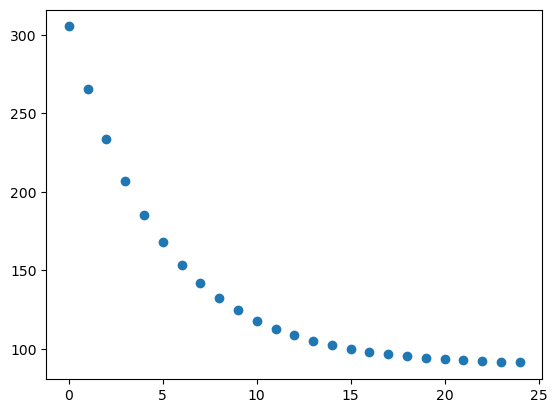

In [29]:
# Plot the cost as a function of number of iterations of the
# gradient descent algorithm.

plt.scatter(range(0, len(J_list)), J_list)
plt.show()

In [136]:
# Keep playing around with gradient descent until you have a good
# learning curve in the plot above (something that appears to flatten out).
# Then answer the questions below. 

# What was your initial choice for alpha?  Your final choice?  How did
# you arrive at these choices?
#
# My first ALPHA score was .0000001. However, this was too big for the graph to show a descending line. 
# So, I decided to try .00000001 and this one gave me the correct line shape. 
#
# How many iterations of gradient descent did you need until convergence?
#
# I had to do 25 iterations until convergence. 
#
# What was your final vector of weights? (w_manual)
#
# Final w: [2.77588762e-06 1.12599289e-05 2.89720726e-04 2.02376816e-04 6.14244867e-03 4.64291690e-05 2.16076709e-04]
#
# What was your final cost of these weights? (w_manual_cost)
#
# 91.29351111869298 is the final cost. 
#
# What was your final vector of weights from Part A? (w_direct)
#
# [-1.45352505e+01 -3.29859089e-01  7.67843024e-03 -3.91355574e-04  -6.79461791e-03  8.52732469e-02  7.53367180e-01]
#
# What cost of these weights? (w_direct_cost)
#
# 5.795085490707611 is the cost. 
#
# Why do you think the final weights and costs from parts A and B are so different?
#
# They are different because of the ways that they were calculated. The final weight from A is the smallest final
# weight that you can get. While we calculated the final weight using standard python calculations, they did not
# calculate the weights the most efficient way since we did for loops to calculate each individual value. For 
# part A, we calculated the dot value with matrix multiplication commands, which is why the results are different.




## Part C: Linear regression with feature scaling and matrix computations

 In this section, you will perform linear regression one more time,
 but adding in feature scaling and matrix computations.


In [137]:
# Write code here to take your original data and scale
# all the features using Z-score scaling.
# I recommend doing this using the pandas df_X dataframe,
# then producing a new numpy matrix at the end.
# Call this matrix X_train_normed_initial.
#
# Hint: this first line of this matrix should be:
# [ 1.48205303,  1.07591459,  0.66328508,  0.61974833, -1.2836176, -1.6232409 ]


mean = df_X.mean()
std_dev = df_X.std()
#print(df_X)

z_score = (df_X - mean)/std_dev
X_train_normed_initial = z_score.to_numpy()

#X_train_normed_initial = df_X.to_numpy()
print(X_train_normed_initial[0])

[ 1.48205303  1.07591459  0.66328508  0.61974833 -1.2836176  -1.6232409 ]


In [138]:
# Verify normed data:

print(X_train_normed_initial.shape) # Should be (392, 6)

# Write code below to add a column of ones to the X_train_normed_initial
# matrix, and produce a new matrix X_train_normed.

# YOUR CODE HERE
v2 = np.ones((m , 1))                                               # creates a 2-d array of length m x 1 
X_train_normed = np.hstack((v2, X_train_normed_initial))            # new matrix



# Verify new dimensions:

print(X_train_normed.shape) # Should be (392, 7)

(392, 6)
(392, 7)


In [139]:
# Write code below to compute the w vector directly using
# the same matrix equation from Part A, but using the normed
# training data (X_train_normed), not X_train.
# Store this in a vector called w_direct_normed.  
# NOTE: Because the X matrix is now scaled (normalized), w_direct_normed
# will have very different numbers than w_direct.

# variables 
x = X_train_normed
y = y_train

# transpose of x 
x_t = x.T


# dot product of transpose of x and x 
dot_product = x_t @ x

# inverse of the dot product
inv_dotProd = np.linalg.inv(dot_product)
w_dir_n = inv_dotProd @ x_t

# multiply 
w_direct_normed = w_dir_n @ y

# Verify:

print(w_direct_normed)

[ 2.34459184e+01 -5.62668108e-01  8.03501684e-01 -1.50637300e-02
 -5.77136585e+00  2.35257301e-01  2.77520621e+00]


In [140]:
# Write code below to compute the cost of this new
# vector of weights (w_direct_normed), and store it in a variable
# called w_direct_normed_cost.  Verify this cost is the same
# cost as w_direct_cost (from Part A).  Again, don't forget to 
# compute the cost for w_direct_normed using X_train_normed.

# YOUR CODE HERE
w_direct_normed_cost = compute_cost(X_train_normed, y_train, w_direct_normed)

# Verify:

print(w_direct_cost)
print(w_direct_normed_cost)

5.795085490707611
5.795085490707721


In [141]:
# Rewrite the compute_cost function as a new version
# (compute_cost_fast) to compute the
# total cost over the entire data set X_data and y_data,
# given parameters vector w, but now use matrix computations
# rather than loops.  Do not call make_prediction.

def compute_cost_fast(X_data, y_data, w):
    """
    X_data: matrix (m, n+1)
    y_data: array of true y values (m)
    w: array of weights (n+1)
    returns: scalar
    """
              
    # formula
    #(.5m)((x * w - y)^T)(x * w - y)
    
    m = len(X_data)
    total_cost = 0
    
    x = X_data                         # x
    y = y_data                         # y^(i)
        
    cost = (x @ w) - y                 # (x * w - y)
    cost_t = cost.T                    # ((x * w - y)^T)
    
    total_cost = cost_t @ cost
    
    return total_cost/ (2 * m) 


In [142]:
# Rewrite the compute_gradient function as a new version
# (compute_gradient_fast) to compute
# the complete gradient for the function J(w).

def compute_gradient_fast(X_data, y_data, w):
    """
    X_data: matrix (m, n+1)
    y_data: array of true y values (m)
    w: array of weights (n+1)
    returns: array of gradients (n+1)
    """
    
    # YOUR CODE HERE
    # (1/m)(X^T)(X*w-y)
    
    gradients = []
    
    m = len(X_data)
    x = X_data                         # x
    y = y_data                         # y^(i)
    
    g = (x @ w) - y 
    grad_w = (x.T)@g
    
    gradients = grad_w/m

    return gradients
    
    

In [143]:
# Write code here to perform gradient descent, using your
# NEW FAST functions above.  You should use three new variables in your
# code:
# - w_manual_normed: which is the vector of weights that gradient
#   descent is designed to find:
# - w_manual_normed_cost, which is the cost of these weights,
# - J_list_fast, which is the list of 
#   costs determined by compute_cost() [like in the in-class lab we did].

# Setup these vars:
w_manual_normed = np.zeros(n+1)  # n+1 weights
w_manual_normed_cost = 0
J_list_fast = []

# YOUR CODE HERE
ALPHA = .001

# must run until convergence 
for ctr in range(0, 3000):
    # checks to see how each iteration changes the w and b values 
    #print("Iteration: ", ctr)
    #print("w = ", w_manual_normed)
    w_manual_normed_cost = compute_cost_fast(X_train_normed, y_train, w_manual_normed)
    #print("cost = ", w_manual_normed_cost)
    J_list_fast.append(w_manual_normed_cost)
    
    # has the derivatives after the 1/m reduction 
    grad_w = compute_gradient_fast(X_train_normed, y_train, w_manual_normed)
    
    # this part does the gradient descent formulas 
    w_manual_normed = w_manual_normed - ALPHA * grad_w 
    
    #print()
    #print("---------------------------------------------")

# Verify:
    
print("Final w:", w_manual_normed)

Final w: [22.28036564 -1.15562524 -1.26620671 -1.17381863 -2.42175018 -0.35189465
  2.37900639]


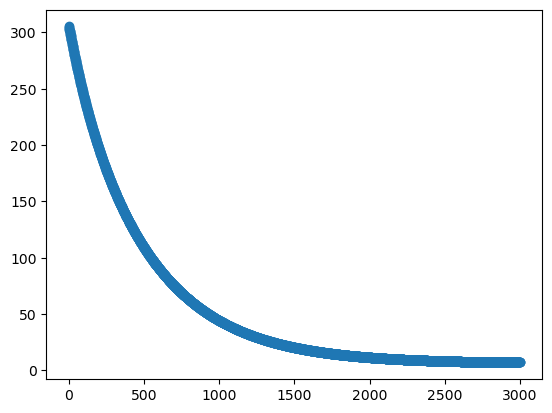

In [144]:
# Let's plot the cost as a function of number of iterations of the
# gradient descent algorithm.

plt.scatter(range(0, len(J_list_fast)), J_list_fast)
plt.show()

In [145]:
# Keep playing around with gradient descent until you have a good
# learning curve in the plot above (something that appears to flatten out).
# Then answer the questions below. 

# What was your initial choice for alpha?  Your final choice?  How did
# you arrive at these choices?
#
# My initial choice was .00000001. However, this gave me a graph that was just a negative slope. So, I kept 
# taking zeros away until it converged with an alpha of .001. 
#
# How did your final choice for alpha here (Part C) differ from Part B?
#
# My final choice for alpha for B was .00000001 (7 zeros) and the one for C was .001-- which was a lot smaller. 
#
# How many iterations of gradient descent did you need until convergence
# here (Part C) versus Part A?
#
# For B, I had 25 iterations until convergence. For C, I had 3000 iterations until convergence. 
#
# What was your final vector of weights? (w_manual_normed)
#
# [22.28036564 -1.15562524 -1.26620671 -1.17381863 -2.42175018 -0.35189465  2.37900639]
#
# What was your final cost of these weights? (w_manual_cost_normed)
#
# 7.032244216271067 was my w_manual_cost_normed.
#
# What was your final vector of calculated directly ? (w_direct_normed)
#
# [ 2.34459184e+01 -5.62668108e-01  8.03501684e-01 -1.50637300e-02
#   -5.77136585e+00  2.35257301e-01  2.77520621e+00]
#
# What cost of these weights? (w_direct_cost_normed)
#
# 5.795085490707721 was my w_direct_cost_normed. 
#
# Why do you think the final weights from both sections of Part C are so similar?
#
# They are similar since the weights are getting closer to the lowest it can be. The w_direct_cost was the smallest
# w weight that we could get, and these values are either the same or close to the same as that value. 
#



In [146]:
# Final checkpoint

# All of these should print OK and match up with what you have above:

print("Part A")
print("Weights:", w_direct)
print("Cost:", w_direct_cost)
print()
print("Part B")
print("Weights:", w_manual)
print("Cost:", w_manual_cost)
print()
print("Part C")
print("Weights (calculated directly):", w_direct_normed)
print("Cost:", w_direct_normed_cost)
print()
print("Weights (calculated with gradient descent):", w_manual_normed)
print("Cost:", w_manual_normed_cost)

Part A
Weights: [-1.45352505e+01 -3.29859089e-01  7.67843024e-03 -3.91355574e-04
 -6.79461791e-03  8.52732469e-02  7.53367180e-01]
Cost: 5.795085490707611

Part B
Weights: [2.77588762e-06 1.12599289e-05 2.89720726e-04 2.02376816e-04
 6.14244867e-03 4.64291690e-05 2.16076709e-04]
Cost: 91.29351111869298

Part C
Weights (calculated directly): [ 2.34459184e+01 -5.62668108e-01  8.03501684e-01 -1.50637300e-02
 -5.77136585e+00  2.35257301e-01  2.77520621e+00]
Cost: 5.795085490707721

Weights (calculated with gradient descent): [22.28036564 -1.15562524 -1.26620671 -1.17381863 -2.42175018 -0.35189465
  2.37900639]
Cost: 7.032244216271067


# Part D (Bonus; up to 5 extra credit points)

Notice that some of the features in the initial plots at the beginning of the notebook
seem to have non-linear correlations with `mpg`.  Try to add some non-linear features
to the data and see if you can decrease the cost even further.